# Bhavika Raheja

# THE SPARKS FOUNDATION
# Graduate Rotional Internship Program, May2021 Batch
# Data Sciencee and Business Analytics
# Task3 - Explotary Data Analysis

## Finding the weak areas of Profit


In [1]:

### Importing  Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as wg

#ignoring the warnings
wg.filterwarnings('ignore')


### Loading the Data

In [2]:
data = pd.read_csv("SampleSuperstore.csv")

### Understanding the content of data provided

In [3]:
data.head (10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
### Exploring the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.duplicated().sum()

17

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


### Dropping the unuseful file

In [8]:
data.drop("Postal Code",axis=1,inplace=True)

### Dropping null values, if any

In [9]:
## Checking for null values
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null values in the data

### Correlation

In [10]:
## finding correlation between the data
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


### we can see that profit is positively correlated with sales and negatively with discount

### Data Visvualization

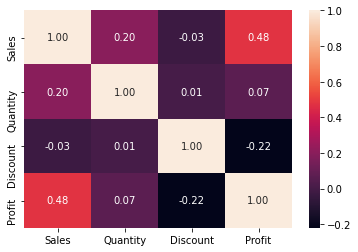

In [11]:
sb.heatmap(data.corr(),annot=True, fmt="0.2f");

In [12]:
Shipmode_revenue = data.groupby(data["Ship Mode"])["Profit"].sum().sort_values()
Segment_revenue = data.groupby(data["Segment"])["Profit"].sum().sort_values()
Country_revenue = data.groupby(data["Country"])["Profit"].sum().sort_values()
City_revenue = data.groupby(data["City"])["Profit"].sum().sort_values()
State_revenue = data.groupby(data["State"])["Profit"].sum().sort_values()
Region_revenue = data.groupby(data["Region"])["Profit"].sum().sort_values()
Category_revenue = data.groupby(data["Category"])["Profit"].sum().sort_values()
Sub_Category_revenue = data.groupby(data["Sub-Category"])["Profit"].sum().sort_values()
Discount_revenue = data.groupby(data["Discount"])["Profit"].sum().sort_values()

## Ship Mode  Wise

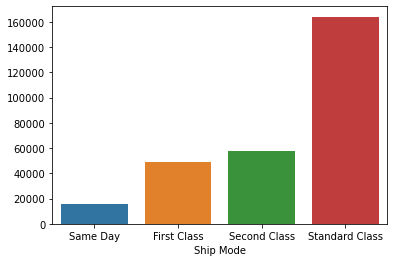

In [13]:
plt.subplots()
sb.barplot(Shipmode_revenue.index, Shipmode_revenue.values, order =Shipmode_revenue.index);

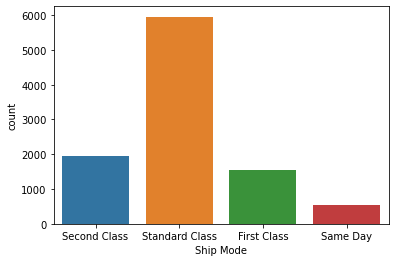

In [14]:
sb.countplot(x= data["Ship Mode"]);

### Mostly people prefer standard class shipping method, therefore it generates maxium profit.

### Segment Wise

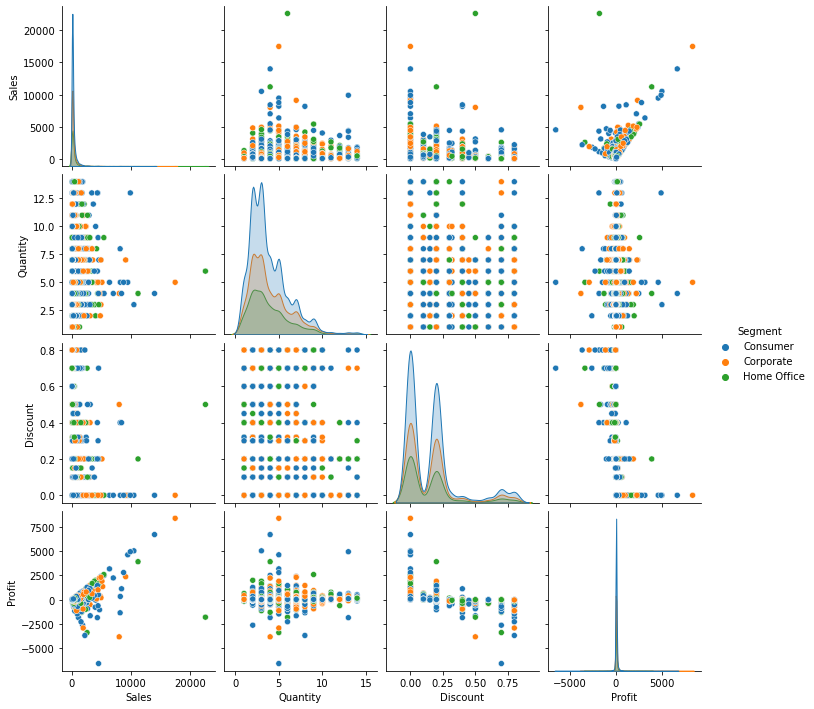

In [15]:
sb.pairplot(data,hue="Segment");

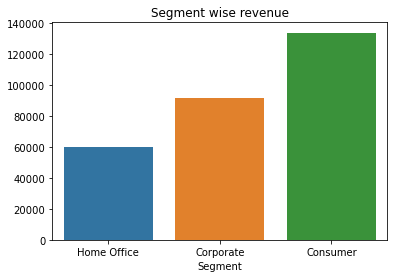

In [16]:
sb.barplot(Segment_revenue.index,Segment_revenue.values, order = Segment_revenue.index)
plt.title ("Segment wise revenue")
plt.xlabel= "Segments"
plt.ylabel="Profits"

### City Wise

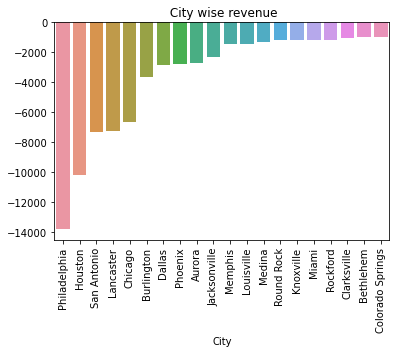

In [17]:
sb.barplot(City_revenue.iloc[0:20].index, City_revenue.iloc[0:20].values, order=City_revenue.iloc[0:20].index)
plt.title(' City wise revenue')
plt.xticks(rotation=90)
plt.ylabel='Profit'

### State Wise

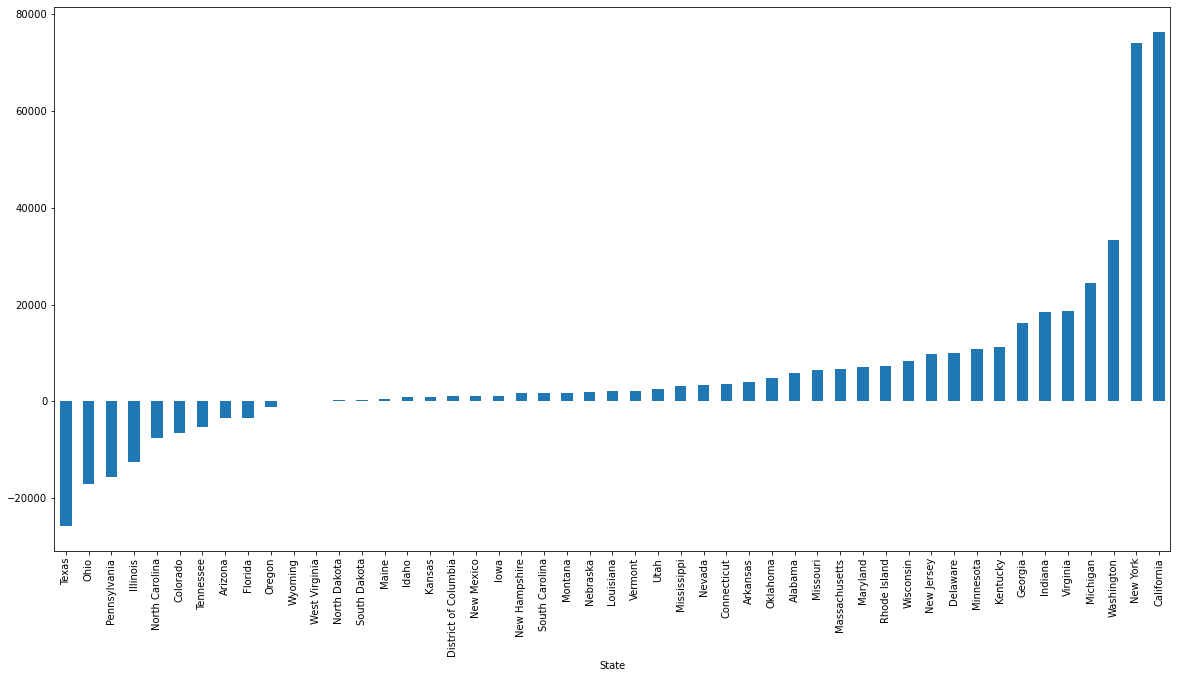

In [44]:
plt.rcParams["figure.figsize"] = (20, 10)
State_revenue.plot.bar();

### Region Wise

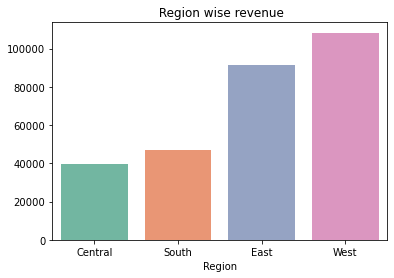

In [18]:
sb.barplot(Region_revenue.index, Region_revenue.values, order=Region_revenue.index, palette = 'Set2')
plt.title(' Region wise revenue')
plt.xlabel='Region'
plt.ylabel='Profit'

### Category Wise

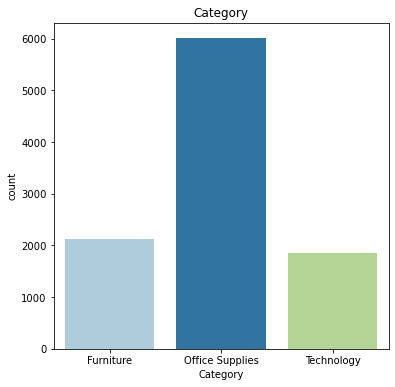

In [19]:
plt.figure(figsize=(6,6))
plt.title('Category')
sb.countplot(x='Category',data=data, palette = 'Paired');

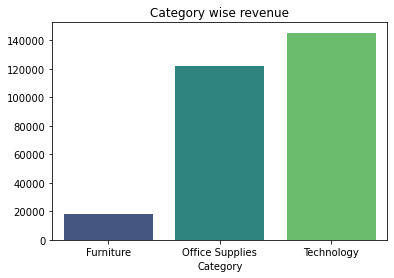

In [20]:
sb.barplot(Category_revenue.index, Category_revenue.values, order=Category_revenue.index, palette = 'viridis')
plt.title('Category wise revenue')
plt.xlabel='Category'
plt.ylabel='Profit'

### Sub- Category Wise

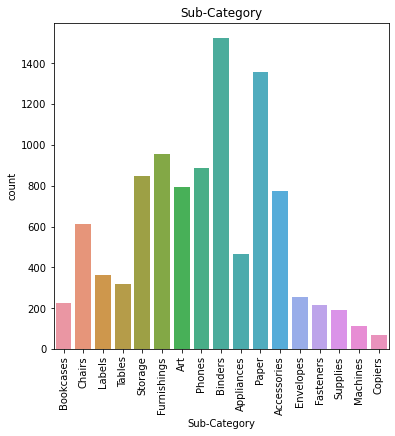

In [24]:
plt.figure(figsize=(6,6))
plt.title('Sub-Category')
sb.countplot(x='Sub-Category',data=data)
plt.xticks(rotation=90);

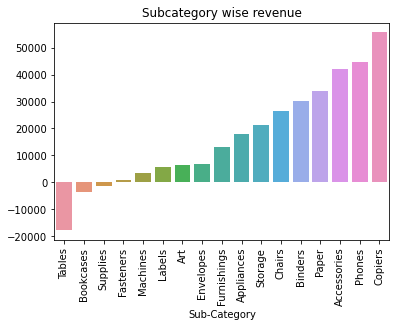

In [42]:
sb.barplot(Sub_Category_revenue.index, Sub_Category_revenue.values, order=Sub_Category_revenue.index)
plt.title('Subcategory wise revenue')
plt.xticks(rotation=90)
plt.ylabel='Profit'

### Discount Wise

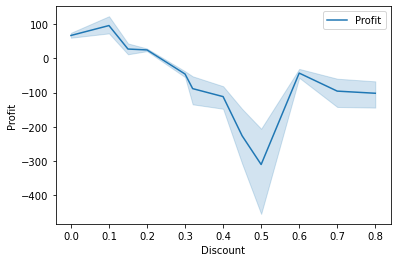

In [21]:
sb.lineplot(x='Discount',y='Profit',label='Profit',data=data)
plt.legend()
plt.show()

### Discount Given In different Sub-Categories

In [22]:
Sub_Category_Discount = data.groupby(data["Sub-Category"])["Discount"].sum().sort_values()

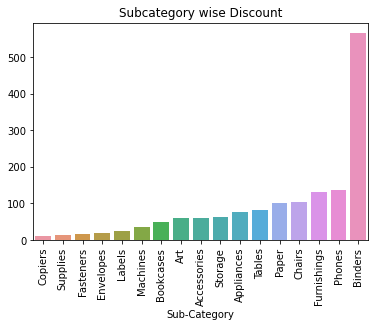

In [23]:
sb.barplot(Sub_Category_Discount.index, Sub_Category_Discount.values, order = Sub_Category_Discount.index)
plt.title('Subcategory wise Discount')
plt.xticks(rotation=90)
plt.ylabel='Discount'

### Binders are given the maximum disocunt, and copies the minimum.Dicount can be changed according to the revenue generated.


### Sales and Profit  of Different Region

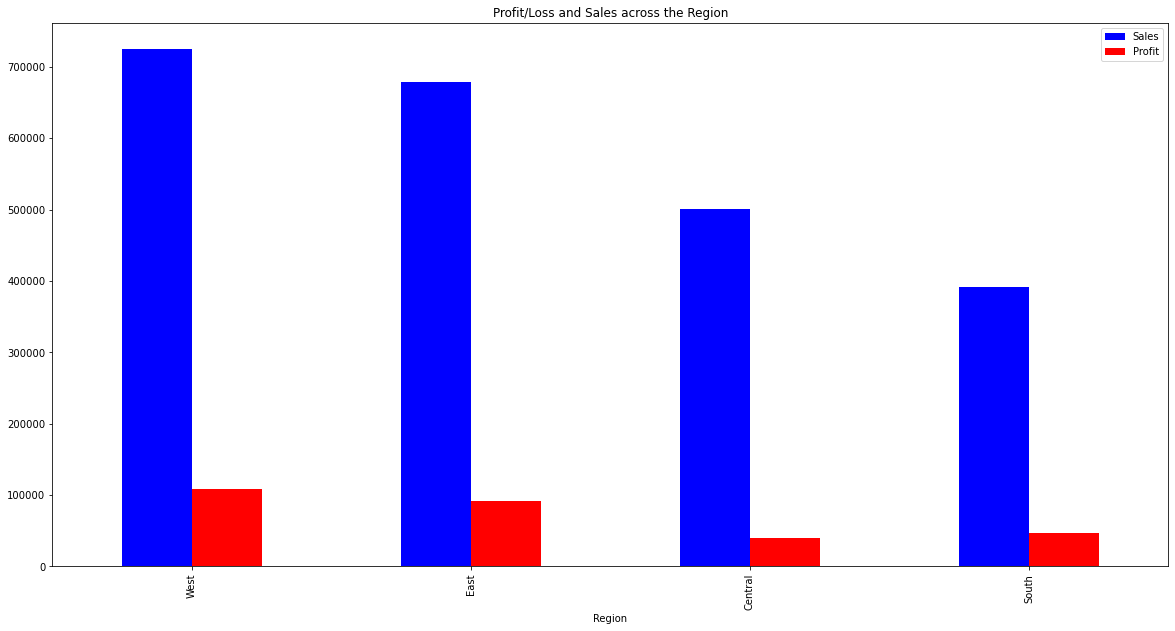

In [24]:
Profit_Loss_Sales=data.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
Profit_Loss_Sales[:].plot.bar(color=['blue','red'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the Region')
plt.xlabel= 'Region'
plt.ylabel= 'Profit/Loss and Sales'
plt.show()

### Sales and Profit  of Different State

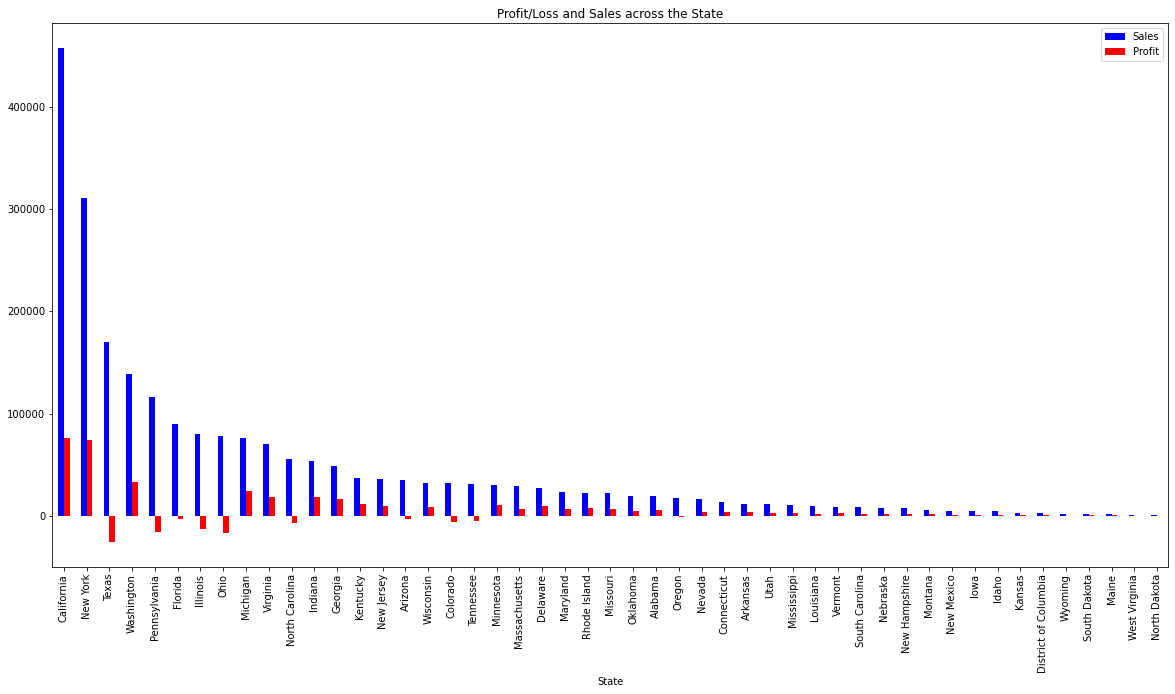

In [25]:
Profit_Loss_Sales_State=data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
Profit_Loss_Sales_State[:].plot.bar(color=['blue','red'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the State')
plt.xlabel= 'State'
plt.ylabel= 'Profit/Loss and Sales'
plt.show()



###  Even after Moderate sales in central , profit is least.
### States  generating negative profit even after moderate sales, need to be work on.


# CONCLUSION

### Dicount should be decrease specially on tables,book cases ,office supplies.
### Central Region should be focused more, as profit generated there is least even after moderate sales. futher sales can be increased in southern region
### Many states generating negative profit even after moderate sales should be focused, states like Texas, Pennsylvania, Ohio.